In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymc3 as pm

sns.set_context('talk')

np.random.seed(12311)

#Generate data set as normal distribution N(0,1)
data = np.random.randn(100)
print("Mean(sd) of data: %.2f (%.2f)"% (np.average(data),np.std(data)))

Mean(sd) of data: 0.08 (0.98)


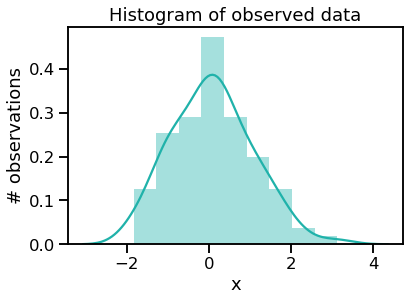

In [2]:
#Plot the distribution of the data using seaborn
ax = plt.subplot()
sns.distplot(data, kde=True, ax=ax, color='lightseagreen')
ax.set(title='Histogram of observed data', xlabel='x', ylabel='# observations');

In [3]:
#Build the model and run the MCMC (with parallel chains)
with pm.Model():
    
    #Prior for mu
    mu = pm.Normal('mu', 0, 1)
    #mu = pm.Uniform('mu', lower=-1, upper=1)
    
    #Prior for sigma
    sigma = pm.Uniform('sigma', lower=0.5, upper=2.0)
    #sigma = pm.InverseGamma('sigma', 0.001, 0.00001)
    
    #Likelihood/model
    returns = pm.Normal('returns', mu=mu, sd=sigma, observed=data)
    
    step = pm.Metropolis()
    trace = pm.sample(5000, step, njobs=4, 
                      start=[{'mu':0+.25*np.random.randn(),
                              'sigma':1+.25*np.random.randn(),} 
                             for j in range(4)])

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [sigma]
>Metropolis: [mu]
Sampling 4 chains: 100%|██████████| 22000/22000 [00:07<00:00, 3122.34draws/s]
The number of effective samples is smaller than 25% for some parameters.


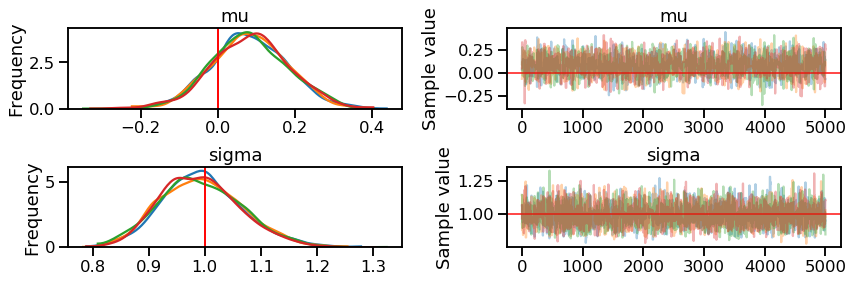

In [4]:
#Plot distributions and traces for mu and sigma
pm.traceplot(trace, lines = {'mu':0, 'sigma':1});

{'mu': 1.0000245918688677, 'sigma': 1.0002697490080108}


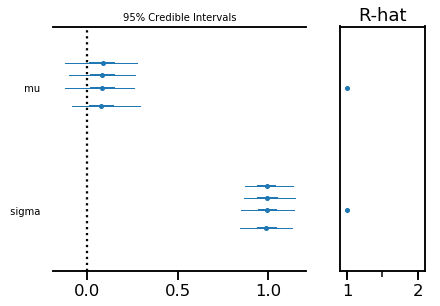

In [5]:
#Let's check for convergence by analyzing the four chains
pm.forestplot(trace, varnames={'mu','sigma'})
print(pm.gelman_rubin(trace))

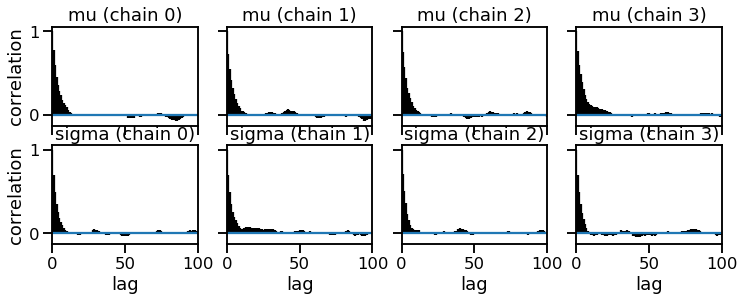

In [6]:
# Check for autocorrelation
pm.autocorrplot(trace);

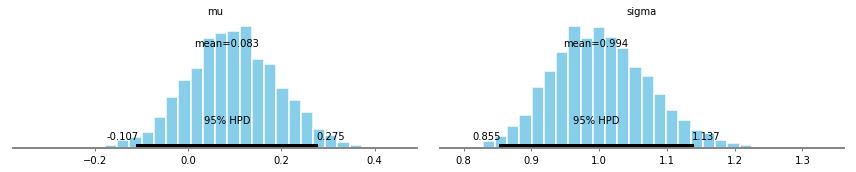

In [7]:
#Plot the posterior with credible intervals (HPD=Highest Posterior Density)
pm.plot_posterior(trace, kde_plot=True);

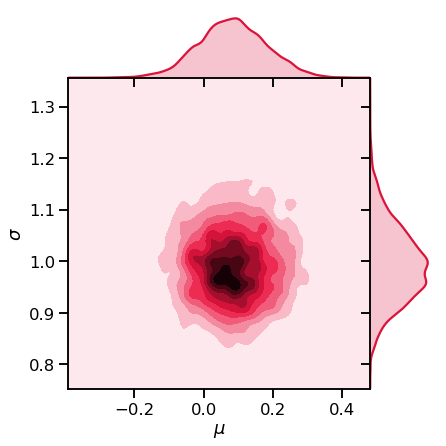

In [8]:
#Plot joint posterior distribution
jg=sns.jointplot(trace['mu'], trace['sigma'], kind="kde", color='crimson', space=0)\
    .set_axis_labels("$\mu$","$\sigma$")\
    .plot_joint(sns.kdeplot, zorder=0, n_levels=4)